<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20211217_crawling%2Bmatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request #웹에 접근하기 위한 모듈
from bs4 import BeautifulSoup as bs 

In [77]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
    # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [78]:
url = 'https://finance.naver.com/item/main.nhn?code=035720'
table_df_list = pd.read_html(url, encoding='euc-kr')    # 한글이 깨짐. utf-8도 깨짐. 그래서 'euc-kr'로 설정함  

# for table in table_df_list:
#   print(table)
#   print("--------------------다음 테이블-------------------")
table_df = table_df_list[4]
table_df

,종목명,카카오*035720,NAVER*035420,아프리카TV*067160,자이언트스텝*289220,키다리스튜디오*020120
0,현재가,118000,384500,192400,127100,15050
1,전일대비,"하향 1,500","하향 3,000","하향 8,100","하향 3,300",상향 100
2,등락률,하향 -1.26%,하향 -0.77%,하향 -4.04%,하향 -2.53%,상향 +0.67%
3,시가총액(억),526026,631592,22115,12272,5017
4,외국인비율(%),30.92,56.37,51.51,3.54,1.47
5,매출액(억),17408,17273,711,85,347
6,영업이익(억),1682,3498,231,-5,35
7,조정영업이익(억),1682,3498,231,-5,35
8,영업이익증가율(%),3.42,4.21,7.35,61.09,91.31
9,당기순이익(억),8663,3227,197,-4,37


In [213]:
new_xticks = table_df.columns[1:].str[0] + '*' + table_df.columns[1:].str[2:-7]
list(new_xticks)

['카*오', 'N*VER', '아*리카TV', '자*언트스텝', '키*리스튜디오']

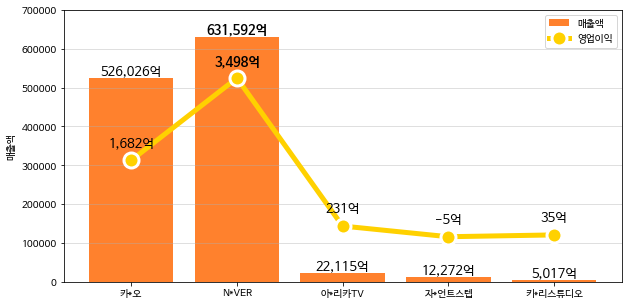

In [233]:
fig, ax = plt.subplots(figsize=(10, 5))

output = ax.bar(new_xticks, table_df.iloc[3, 1:].astype('int'), label = '매출액', color='#ff812d')
ax.set_ylabel('매출액')
ax.set_ylim(0, 700000)
# ax.axis()
# ax.yaxis.set_visible(False)
# ax.set_yticks([])
ax.grid(True, axis='y', alpha=0.5)

maxval = max(table_df.iloc[3, 1:].astype('int'))

for idx, val in enumerate(table_df.iloc[3, 1:].astype('int')):
  if val == maxval:
    ax.text(new_xticks[idx], val+9000, format(val, ',')+'억', ha='center', fontsize=13, fontweight='bold')
  else:
    ax.text(new_xticks[idx], val+9000, format(val, ',')+'억', ha='center', fontsize=13)

ax2 = ax.twinx()
profit = ax2.plot(new_xticks, table_df.iloc[6, 1:].astype('int'), label = '영업이익', color='#ffd100', marker='o', ms='15', mec='w', markeredgewidth=3 ,lw=5)
ax2.set_ylim(-1000,5000)
ax2.set_ylabel('매출액')
ax2.set_yticks([-1000, 0, 5000])
ax2.axis('off')

maxval = max(table_df.iloc[6, 1:].astype('int'))

for idx, val in enumerate(table_df.iloc[6, 1:].astype('int')):
  if val == maxval:
    ax2.text(new_xticks[idx], val+300, format(val, ',')+'억', ha='center', fontsize=13, fontweight="bold")
  else:
    ax2.text(new_xticks[idx], val+300, format(val, ',')+'억', ha='center', fontsize=13)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)



In [81]:
table_df.co[0]

Index(['카카오*035720', 'NAVER*035420', '아프리카TV*067160', '자이언트스텝*289220',
       '키다리스튜디오*020120'],
      dtype='object')

In [87]:
table_df.columns[1:].str[:-7]

Index(['카카오', 'NAVER', '아프리카TV', '자이언트스텝', '키다리스튜디오'], dtype='object')

In [94]:
table_df.iloc[3, 1:].astype('int')

카카오*035720        526026
NAVER*035420      631592
아프리카TV*067160      22115
자이언트스텝*289220      12272
키다리스튜디오*020120      5017
Name: 3, dtype: int64

In [134]:
type(val)

int